# Importing libraries

In [1]:
import torch.optim as optim
from model import Model
from torchsummary import summary

from dataset import CIFAR10
from utils import get_device, visualize_data
from backprop import (
    train,
    test,
    plot_graphs,
    get_misclassified_images,
    show_misclassified_images
)

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data = CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


# Data Transformations

In [3]:
train_loader , test_loader = data.get_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = get_device()

Device :  cuda


In [5]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

# Visualizing the data

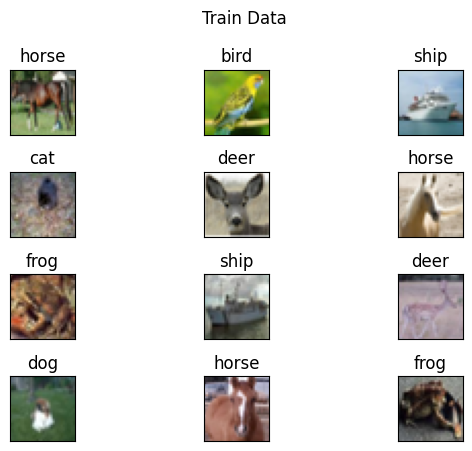

In [6]:
visualize_data(train_loader, 12, "Train Data", classes)

# The Model

In [7]:
model = Model(norm_type="batch",skip=True, dropout=0.01).to(device)

# Model summary

In [8]:
summary(model,input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
         ConvLayer-5           [-1, 16, 30, 30]               0
            Conv2d-6           [-1, 16, 28, 28]           2,304
       BatchNorm2d-7           [-1, 16, 28, 28]              32
              ReLU-8           [-1, 16, 28, 28]               0
           Dropout-9           [-1, 16, 28, 28]               0
        ConvLayer-10           [-1, 16, 28, 28]               0
           Conv2d-11           [-1, 24, 28, 28]             384
        MaxPool2d-12           [-1, 24, 14, 14]               0
           Conv2d-13           [-1, 24, 14, 14]           5,184
      BatchNorm2d-14           [-1, 24,

# Training and Testing our Model

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.3)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.2255840301513672 Batch_id=390 Accuracy=44.07: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]



Test set: Average loss: 1.2709, Accuracy: 5411/10000 (54.11%)

EPOCH: 1


Loss=1.1086848974227905 Batch_id=390 Accuracy=59.50: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]



Test set: Average loss: 1.2042, Accuracy: 5650/10000 (56.50%)

EPOCH: 2


Loss=0.9367579221725464 Batch_id=390 Accuracy=64.68: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]



Test set: Average loss: 1.0282, Accuracy: 6346/10000 (63.46%)

EPOCH: 3


Loss=0.8414599299430847 Batch_id=390 Accuracy=67.94: 100%|██████████| 391/391 [00:20<00:00, 18.88it/s]



Test set: Average loss: 1.0176, Accuracy: 6389/10000 (63.89%)

EPOCH: 4


Loss=0.7784032821655273 Batch_id=390 Accuracy=70.35: 100%|██████████| 391/391 [00:20<00:00, 18.70it/s]



Test set: Average loss: 0.9314, Accuracy: 6685/10000 (66.85%)

EPOCH: 5


Loss=0.7692685723304749 Batch_id=390 Accuracy=72.11: 100%|██████████| 391/391 [00:20<00:00, 19.13it/s]



Test set: Average loss: 0.8907, Accuracy: 6855/10000 (68.55%)

EPOCH: 6


Loss=0.7377382516860962 Batch_id=390 Accuracy=73.93: 100%|██████████| 391/391 [00:20<00:00, 19.20it/s]



Test set: Average loss: 0.8255, Accuracy: 7068/10000 (70.68%)

EPOCH: 7


Loss=0.5249907374382019 Batch_id=390 Accuracy=75.16: 100%|██████████| 391/391 [00:20<00:00, 18.97it/s]



Test set: Average loss: 0.7876, Accuracy: 7273/10000 (72.73%)

EPOCH: 8


Loss=0.7687986493110657 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]



Test set: Average loss: 0.7761, Accuracy: 7261/10000 (72.61%)

EPOCH: 9


Loss=0.5635818243026733 Batch_id=390 Accuracy=77.19: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]



Test set: Average loss: 0.7716, Accuracy: 7373/10000 (73.73%)

EPOCH: 10


Loss=0.6957190036773682 Batch_id=390 Accuracy=78.29: 100%|██████████| 391/391 [00:20<00:00, 18.66it/s]



Test set: Average loss: 0.8209, Accuracy: 7063/10000 (70.63%)

Epoch 00011: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 11


Loss=0.404841810464859 Batch_id=390 Accuracy=81.27: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]



Test set: Average loss: 0.6375, Accuracy: 7805/10000 (78.05%)

EPOCH: 12


Loss=0.3403811454772949 Batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]



Test set: Average loss: 0.6238, Accuracy: 7845/10000 (78.45%)

EPOCH: 13


Loss=0.46034231781959534 Batch_id=390 Accuracy=82.40: 100%|██████████| 391/391 [00:21<00:00, 18.17it/s]



Test set: Average loss: 0.6457, Accuracy: 7769/10000 (77.69%)

Epoch 00014: reducing learning rate of group 0 to 9.0000e-04.
EPOCH: 14


Loss=0.5131976008415222 Batch_id=390 Accuracy=83.52: 100%|██████████| 391/391 [00:21<00:00, 18.10it/s]



Test set: Average loss: 0.6094, Accuracy: 7902/10000 (79.02%)

EPOCH: 15


Loss=0.3888058364391327 Batch_id=390 Accuracy=83.69: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]



Test set: Average loss: 0.6099, Accuracy: 7917/10000 (79.17%)

Epoch 00016: reducing learning rate of group 0 to 2.7000e-04.
EPOCH: 16


Loss=0.3163922429084778 Batch_id=390 Accuracy=84.29: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]



Test set: Average loss: 0.6072, Accuracy: 7911/10000 (79.11%)

EPOCH: 17


Loss=0.6307266354560852 Batch_id=390 Accuracy=84.20: 100%|██████████| 391/391 [00:21<00:00, 18.37it/s]



Test set: Average loss: 0.6077, Accuracy: 7895/10000 (78.95%)

Epoch 00018: reducing learning rate of group 0 to 8.1000e-05.
EPOCH: 18


Loss=0.3693121373653412 Batch_id=390 Accuracy=84.45: 100%|██████████| 391/391 [00:21<00:00, 17.84it/s]



Test set: Average loss: 0.6055, Accuracy: 7904/10000 (79.04%)

EPOCH: 19


Loss=0.4783662259578705 Batch_id=390 Accuracy=84.46: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]



Test set: Average loss: 0.6071, Accuracy: 7906/10000 (79.06%)

Epoch 00020: reducing learning rate of group 0 to 2.4300e-05.


# Plotting results

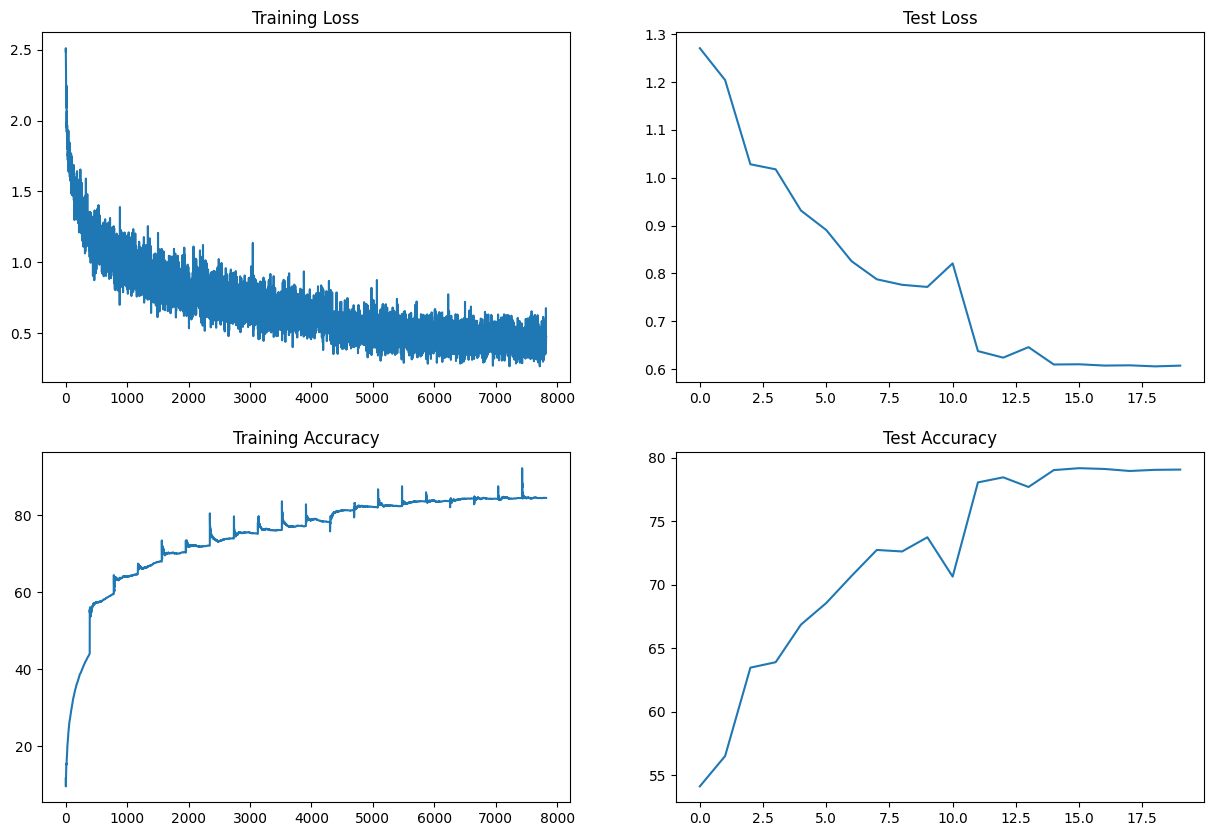

In [10]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)

# Misclassified Images

In [11]:
misclassified_images, predictions, labels = get_misclassified_images(model, test_loader, device)

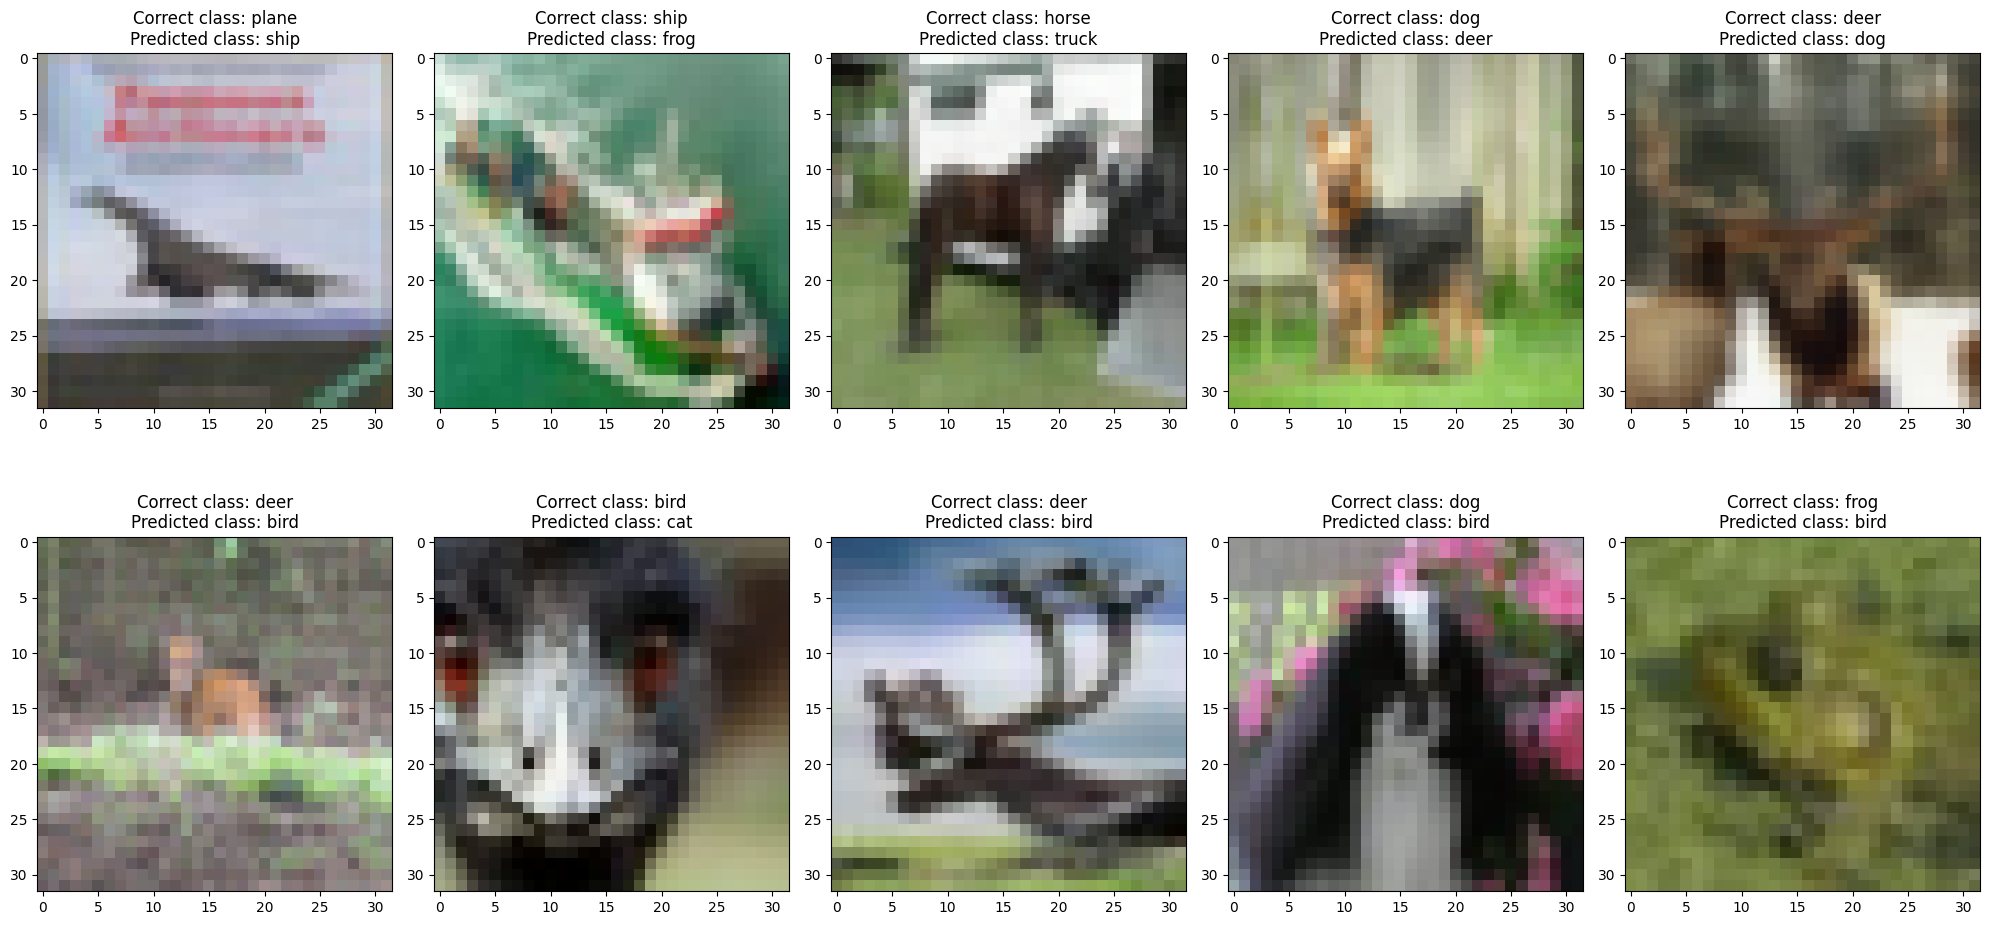

In [12]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)